In [15]:
# Quantum Fingerprint via Fractals
# Inspired by: Visualizing Quantum Computing using fractals

import numpy as np
import matplotlib.pyplot as plt


In [16]:


# Define a function to apply a parameterized unitary gate to a qubit

def apply_unitary(state, theta, phi):
    """
    Apply a parameterized unitary rotation to a qubit state vector.
    """
    U = np.array([
        [np.cos(theta/2), -np.exp(1j*phi)*np.sin(theta/2)],
        [np.exp(-1j*phi)*np.sin(theta/2), np.cos(theta/2)]
    ])
    return U @ state


In [17]:

# Fractal generation using qubit state evolution
def quantum_fingerprint_fractal(iterations=100000, theta=np.pi/3, phi=np.pi/4):
    points = []
    # Start in |0> state
    state = np.array([1.0 + 0j, 0.0 + 0j])

    for i in range(iterations):
        # Apply unitary transformation
        state = apply_unitary(state, theta, phi)

        # Extract complex number via stereographic projection
        alpha, beta = state
        if abs(alpha) < 1e-9:
            continue  # skip near-infinite values
        z = beta / alpha

        # Normalize the state to avoid numerical drift
        state = state / np.linalg.norm(state)

        # Store only finite, bounded points
        if np.isfinite(z) and abs(z) < 1e3:
            points.append(z)

    return np.array(points)


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


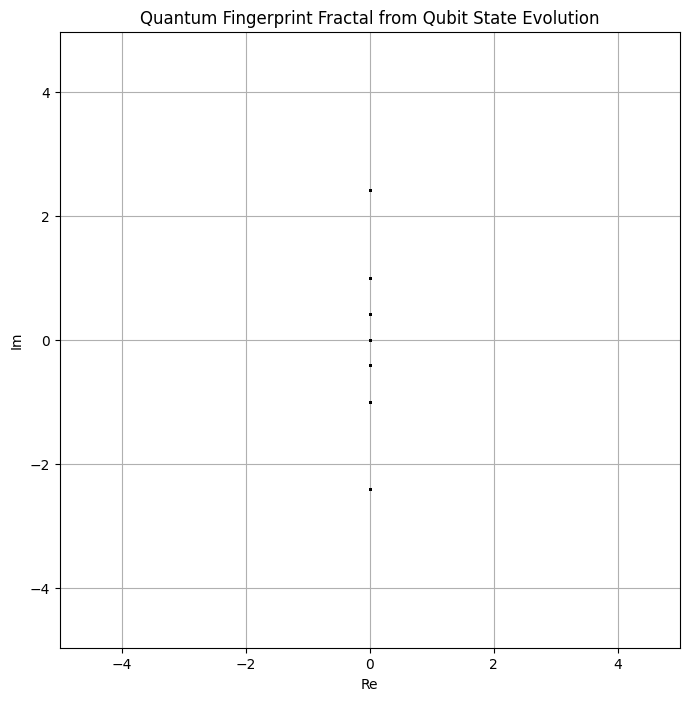

In [18]:

# Generate fractal points
# fractal_points = quantum_fingerprint_fractal()
fractal_points = quantum_fingerprint_fractal(theta=np.pi/4, phi=np.pi/2)

# Plot the fractal
plt.figure(figsize=(8, 8))
plt.plot(fractal_points.real, fractal_points.imag, 'k.', markersize=0.3)
plt.title("Quantum Fingerprint Fractal from Qubit State Evolution")
plt.xlabel("Re")
plt.ylabel("Im")
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.show()
